<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/Forniture_precio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/ag0466154-cpu/Estadistica2025B/refs/heads/main/Furniture.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [ ]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [ ]:
df.columns = ['precio', 'costo', 'ventas', 'margen_beneficio', 'inventario',
       'porcentaje_descuento', 'dias_de_entrega', 'categoría', 'material', 'color',
       'ubicación', 'estación', 'tipo_tienda', 'marca', 'ganancia']

b)

Index(['categoría', 'material', 'color', 'ubicación', 'estación',
       'tipo_tienda', 'marca'],
      dtype='object')


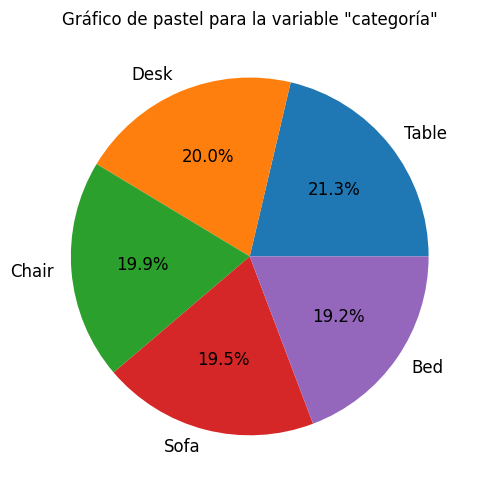

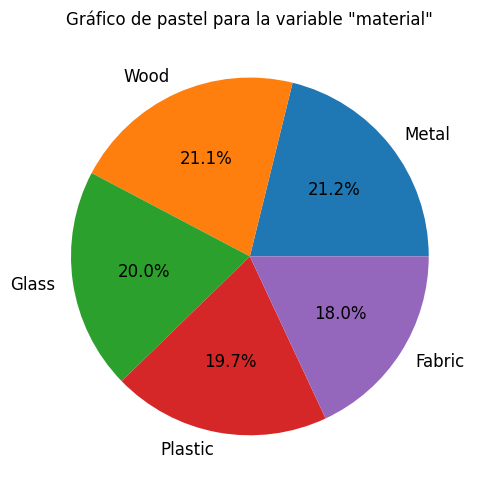

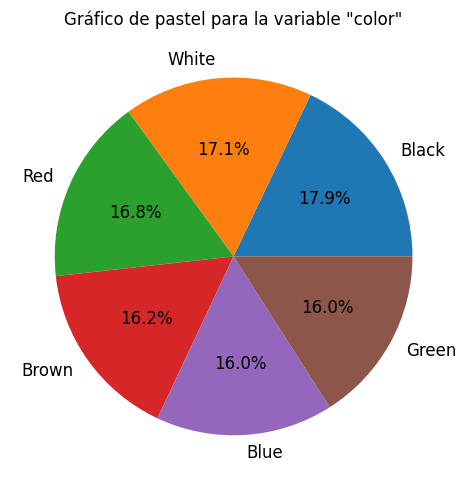

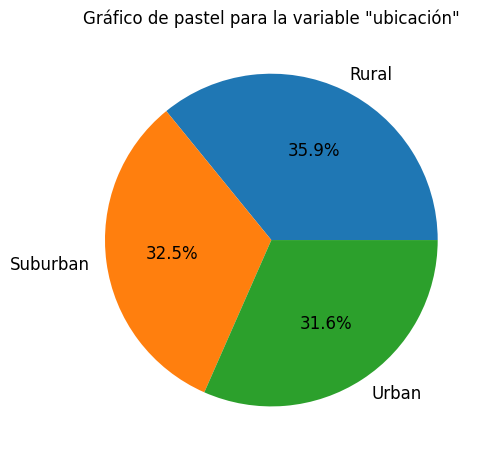

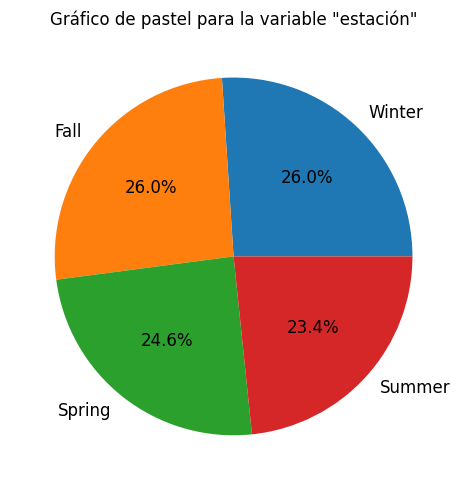

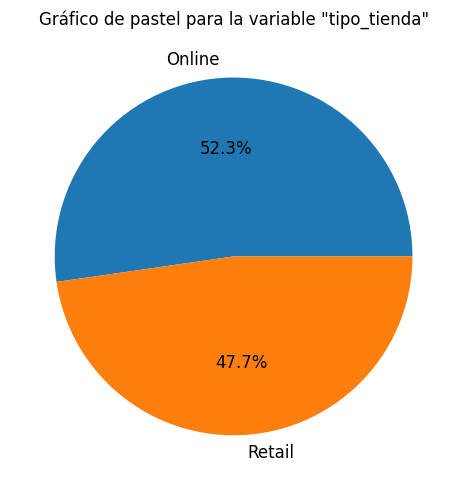

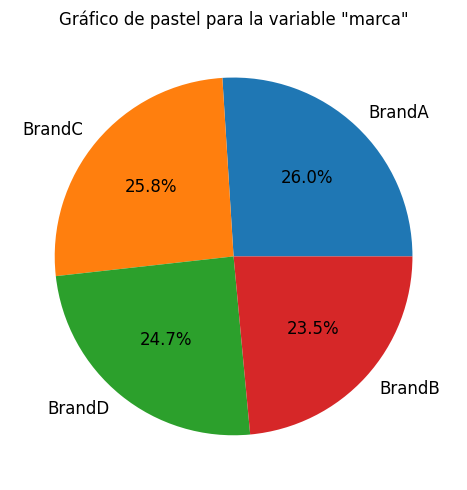

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

for col in categorical_cols:
    fig, ax = plt.subplots(figsize=(5, 5))

    df[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        shadow=False,
        textprops={'fontsize': 12}
    )
    ax.set_title(f'Gráfico de pastel para la variable "{col}"', fontsize=12)
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

c)

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols('precio ~ costo + ventas + inventario + porcentaje_descuento + dias_de_entrega + C(categoría) + C(material) + C(color) + C(ubicación) + C(estación) + C(tipo_tienda) + C(marca) + ganancia',
                    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(categoría),4.0,9.657745e+04,2.414436e+04,11.167454,5.588145e-09
C(material),4.0,8.895205e+04,2.223801e+04,10.285712,2.927846e-08
C(color),5.0,3.360018e+04,6.720036e+03,3.108207,8.420329e-03
C(ubicación),2.0,6.284114e+04,3.142057e+04,14.532907,5.312159e-07
C(estación),3.0,3.940800e+04,1.313600e+04,6.075774,4.068682e-04
C(tipo_tienda),1.0,6.042131e+02,6.042131e+02,0.279466,5.970991e-01
C(marca),3.0,3.198871e+04,1.066290e+04,4.931896,2.038882e-03
costo,1.0,3.693319e+07,3.693319e+07,17082.647438,0.000000e+00
ventas,1.0,2.565956e+03,2.565956e+03,1.186828,2.760766e-01
inventario,1.0,6.987878e+03,6.987878e+03,3.232092,7.233042e-02


d)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Bed  Chair  12.1689 0.5927 -10.6785 35.0163  False
   Bed   Desk  18.7634 0.1632  -4.0391 41.5659  False
   Bed   Sofa  13.6787 0.4802  -9.2721 36.6295  False
   Bed  Table   14.382 0.4049  -8.0828 36.8467  False
 Chair   Desk   6.5945 0.9318 -16.0199  29.209  False
 Chair   Sofa   1.5098 0.9998 -21.2542 24.2738  False
 Chair  Table   2.2131 0.9988 -20.0608 24.4869  False
  Desk   Sofa  -5.0847 0.9734 -27.8036 17.6342  False
  Desk  Table  -4.3815 0.9834 -26.6093 17.8463  False
  Sofa  Table   0.7032    1.0 -21.6766 23.0831  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

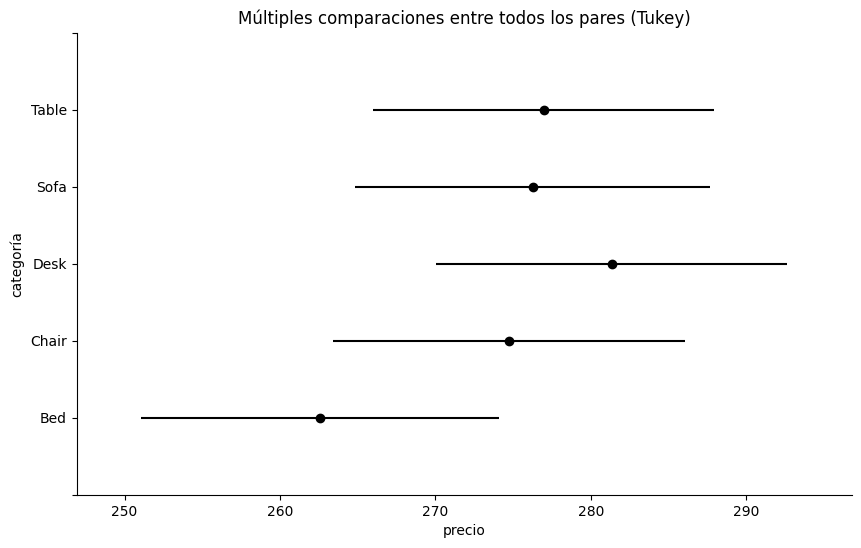

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['categoría'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="categoría", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["categoría"].unique()

array(['Bed', 'Chair', 'Table', 'Sofa', 'Desk'], dtype=object)

In [ ]:
df["categoría"]=df["categoría"].map({"Bed":0, "Chair":1, "Table":1, "Sofa":1, "Desk":2})

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
 Fabric   Glass -16.3299  0.306 -39.5288  6.8691  False
 Fabric   Metal -14.3415 0.4279  -37.237  8.5539  False
 Fabric Plastic -15.6566 0.3534 -38.9449  7.6316  False
 Fabric    Wood  -8.0018 0.8757 -30.9072 14.9035  False
  Glass   Metal   1.9883 0.9992 -20.2933 24.2699  False
  Glass Plastic   0.6733    1.0 -22.0118 23.3583  False
  Glass    Wood   8.3281 0.8463 -13.9638 30.6199  False
  Metal Plastic  -1.3151 0.9999 -23.6896 21.0594  False
  Metal    Wood   6.3397 0.9343  -15.636 28.3155  False
Plastic    Wood   7.6548 0.8839 -14.7299 30.0395  False
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

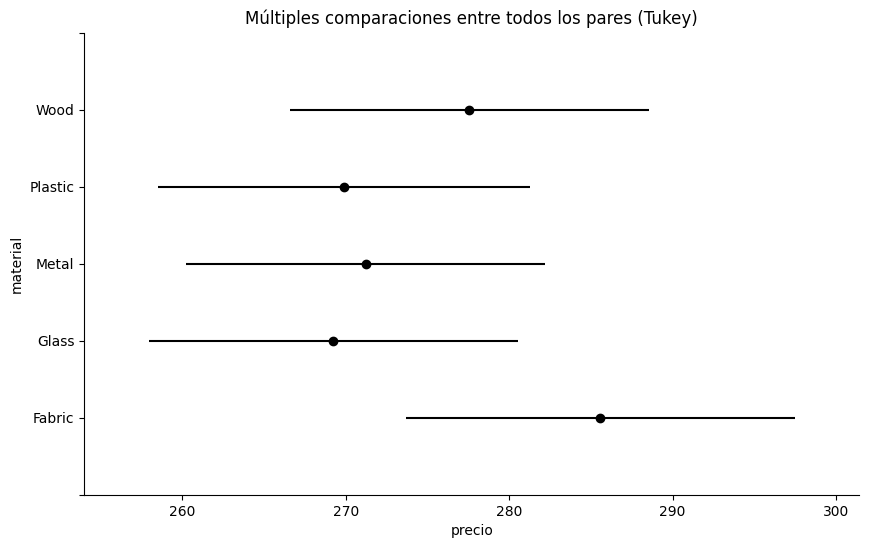

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['material'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="material", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["material"].unique()

array(['Plastic', 'Glass', 'Metal', 'Wood', 'Fabric'], dtype=object)

In [ ]:
df["material"] = df["material"].map({"Plastic":0, "Glass":0, "Metal":0, "Wood":2, "Fabric":1})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Black   Blue  -6.6588  0.977 -32.3394 19.0218  False
 Black  Brown  -6.3939 0.9805 -31.9909 19.2031  False
 Black  Green  -6.9891 0.9717 -32.7037 18.7254  False
 Black    Red  -0.2042    1.0 -25.5921 25.1836  False
 Black  White   0.4321    1.0 -24.8326 25.6967  False
  Blue  Brown   0.2649    1.0 -26.0356 26.5654  False
  Blue  Green  -0.3304    1.0 -26.7452 26.0845  False
  Blue    Red   6.4546 0.9813 -19.6424 32.5516  False
  Blue  White   7.0908 0.9712 -18.8863  33.068  False
 Brown  Green  -0.5952    1.0 -26.9289 25.7384  False
 Brown    Red   6.1897 0.9843  -19.825 32.2045  False
 Brown  White    6.826 0.9753 -19.0685 32.7205  False
 Green    Red   6.7849 0.9769 -19.3454 32.9153  False
 Green  White   7.4212 0.9651 -18.5895 33.4319  False
   Red  White   0.6363    1.0 -25.0515 26.3241  False
----------------------------

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

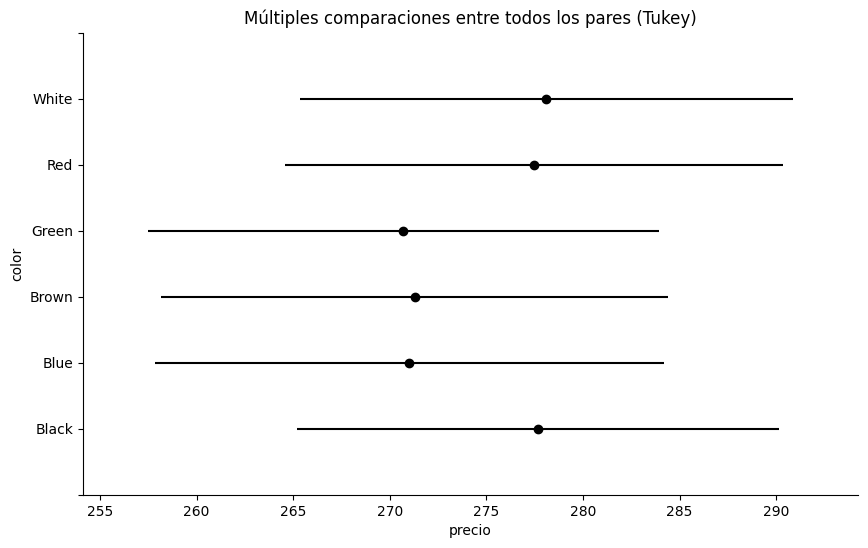

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['color'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="color", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["color"].unique()

array(['Red', 'Blue', 'Black', 'Green', 'Brown', 'White'], dtype=object)

In [ ]:
df["color"] = df["color"].map({"Red":1, "Blue":0, "Black":1, "Green":0, "Brown":0, "White":1})


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
   Rural Suburban   3.8272 0.8179 -11.0323 18.6867  False
   Rural    Urban  -8.4754   0.38  -23.448  6.4971  False
Suburban    Urban -12.3026 0.1441 -27.6331  3.0279  False
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

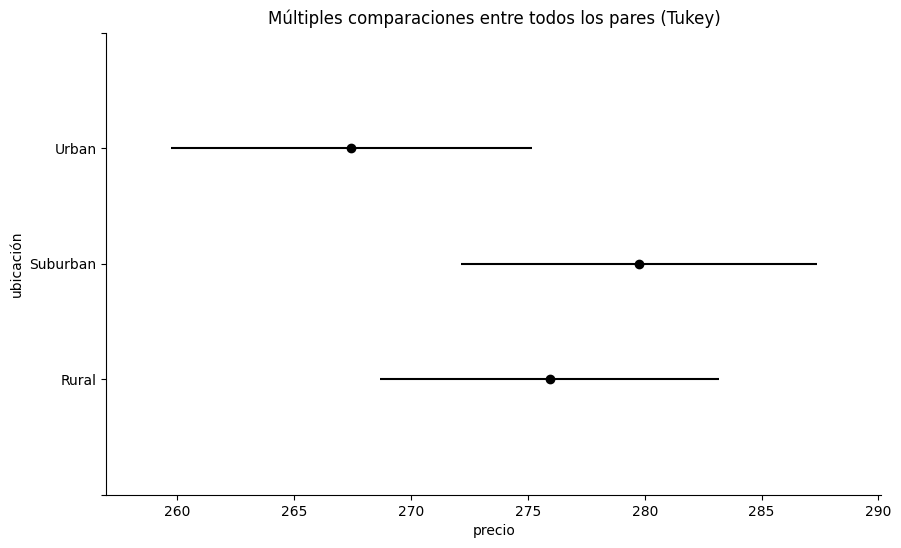

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['ubicación'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="ubicación", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["ubicación"].unique()

array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [ ]:
df["ubicación"] = df["ubicación"].map({"Rural":0, "Suburban":1, "Urban":2})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Fall Spring  -1.5262 0.9969 -20.4601 17.4077  False
  Fall Summer  -5.1699 0.8999 -24.3524 14.0126  False
  Fall Winter  -9.8403 0.5272 -28.4952  8.8146  False
Spring Summer  -3.6437 0.9632 -23.0976 15.8102  False
Spring Winter  -8.3141 0.6717  -27.248 10.6198  False
Summer Winter  -4.6704 0.9238 -23.8529 14.5121  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

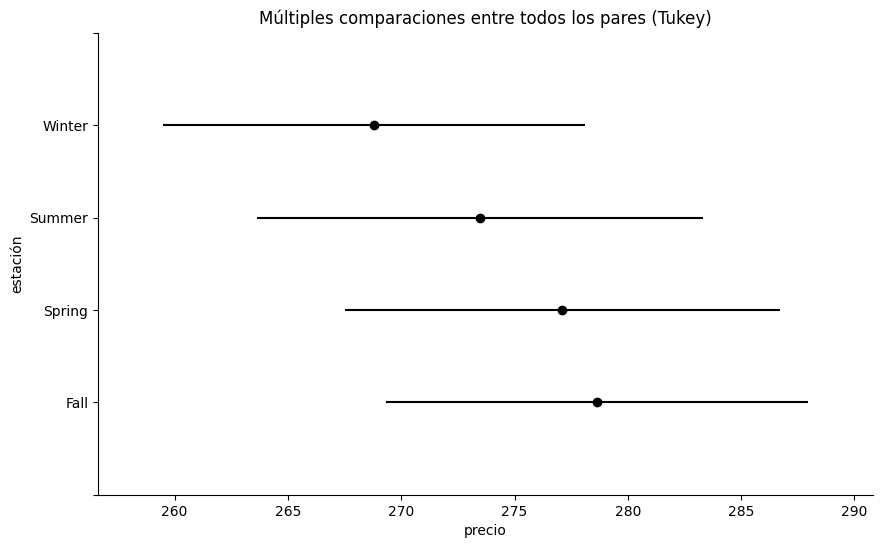

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['estación'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="estación", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["estación"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [ ]:
df["estación"] = df["estación"].map({"Spring":0, "Summer":1, "Fall":0, "Winter":2})


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
BrandA BrandB   0.0433    1.0 -19.1132 19.1998  False
BrandA BrandC   7.7988 0.7071 -10.9153 26.5129  False
BrandA BrandD   6.0373 0.8447 -12.8735  24.948  False
BrandB BrandC   7.7555 0.7268 -11.4433 26.9543  False
BrandB BrandD   5.9939 0.8569 -13.3967 25.3846  False
BrandC BrandD  -1.7615 0.9952 -20.7152 17.1921  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

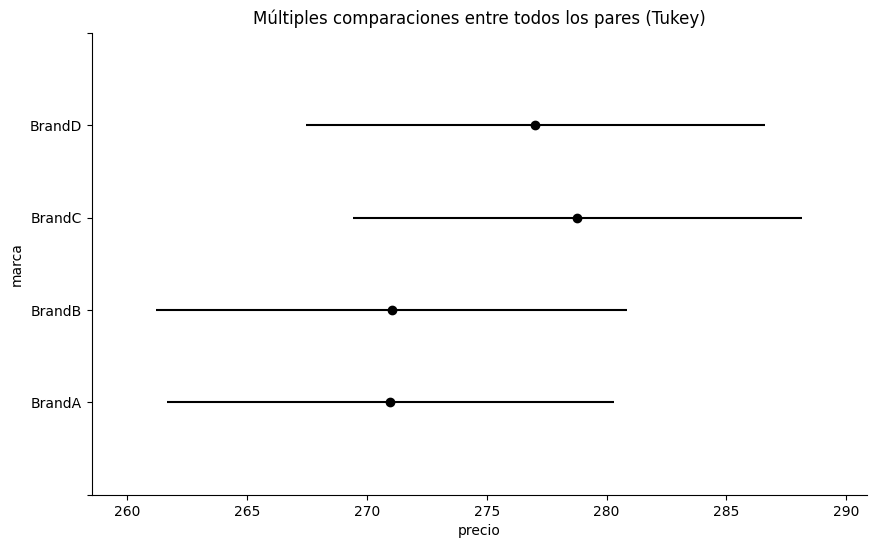

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['precio'], # Variable de respuesta
    groups=df['marca'],          # Variable categorica
    alpha=nivel_de_significancia) # nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos"
tukey.plot_simultaneous(ylabel="marca", xlabel="precio")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df["marca"].unique()

array(['BrandA', 'BrandD', 'BrandB', 'BrandC'], dtype=object)

In [ ]:
df["marca"] = df["marca"].map({'BrandA':0, 'BrandD':1, 'BrandB':0, 'BrandC':1})
df

,precio,costo,ventas,margen_beneficio,inventario,porcentaje_descuento,dias_de_entrega,categoría,material,color,ubicación,estación,tipo_tienda,marca,ganancia
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,0,1,0,0,Online,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,0,0,0,1,Online,1,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,1,0,1,1,0,Online,1,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,1,0,0,0,1,Retail,1,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,0,0,0,0,Online,1,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,1,0,1,1,0,Retail,0,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,0,0,1,2,1,Retail,1,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,2,1,1,0,1,Online,1,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,2,0,1,1,0,Retail,0,18963.246944


e)

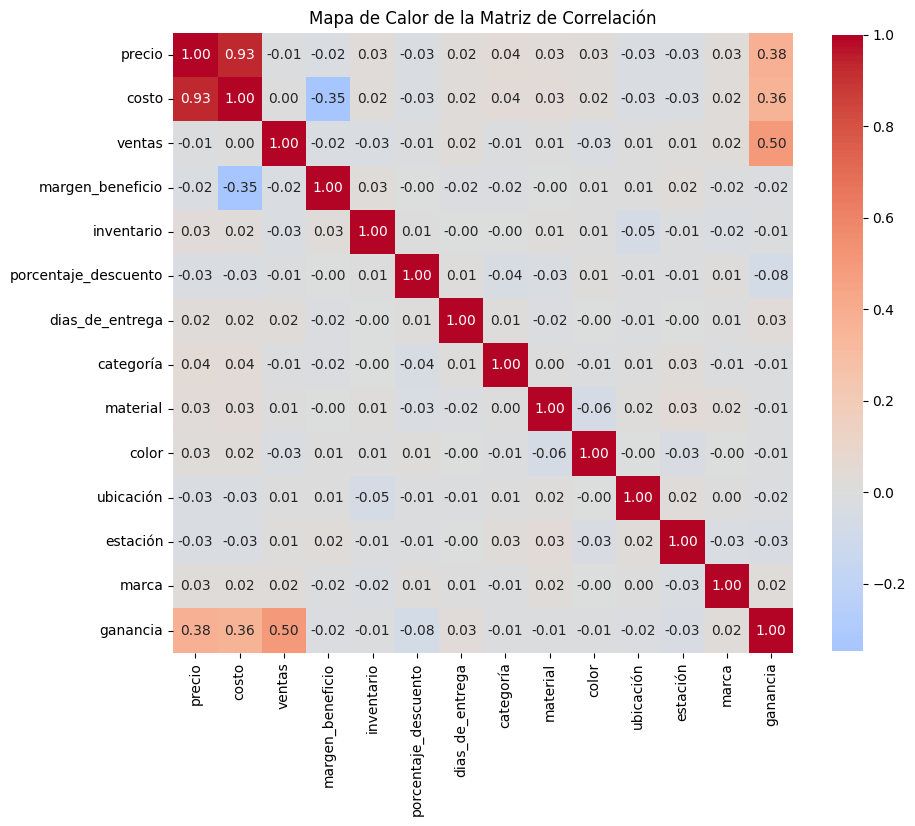

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.drop(columns=['tipo_tienda'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

f)

In [ ]:
modelo_lineal.params

,0
Intercept,40.717948
C(categoría)[T.Chair],0.911984
C(categoría)[T.Desk],3.362382
C(categoría)[T.Sofa],0.427348
C(categoría)[T.Table],-1.521009
C(material)[T.Glass],1.017281
C(material)[T.Metal],-0.108546
C(material)[T.Plastic],-0.943097
C(material)[T.Wood],0.503069
C(color)[T.Blue],4.101355


g)

Coeficiente de determinación:  0.9726

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
costo,1.0,3.725635e+07,3.725635e+07,79145.974950,0.000000
ventas,1.0,2.683882e+03,2.683882e+03,5.701536,0.017024
margen_beneficio,1.0,4.378709e+06,4.378709e+06,9301.962708,0.000000
inventario,1.0,1.018827e+02,1.018827e+02,0.216436,0.641810
porcentaje_descuento,1.0,2.200274e+02,2.200274e+02,0.467418,0.494241
dias_de_entrega,1.0,5.074094e+02,5.074094e+02,1.077921,0.299264
color,1.0,4.251456e+01,4.251456e+01,0.090316,0.763801
ubicación,1.0,3.613114e+00,3.613114e+00,0.007676,0.930193
estación,1.0,6.393258e+02,6.393258e+02,1.358159,0.243968
ganancia,1.0,7.972743e+03,7.972743e+03,16.936992,0.000040


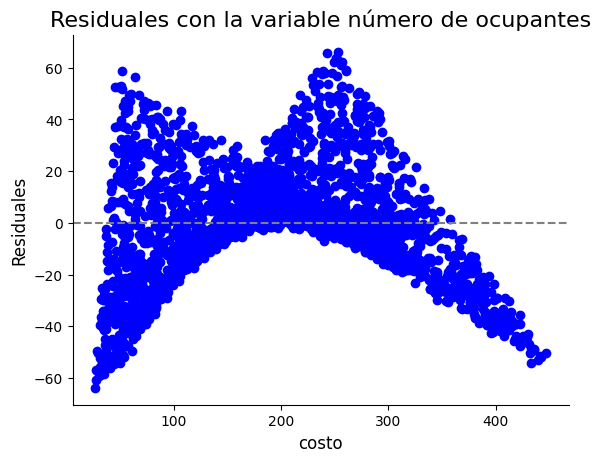

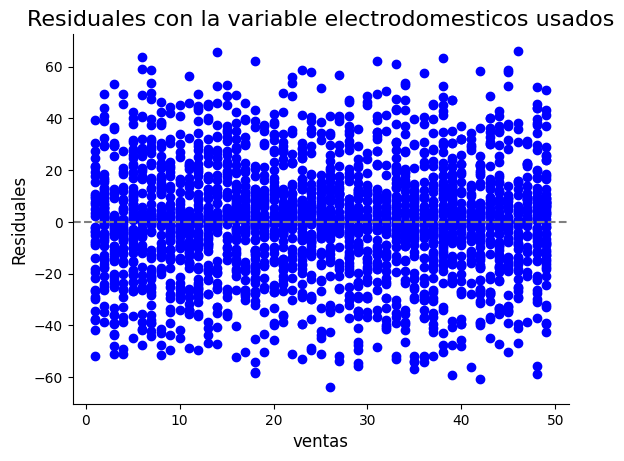

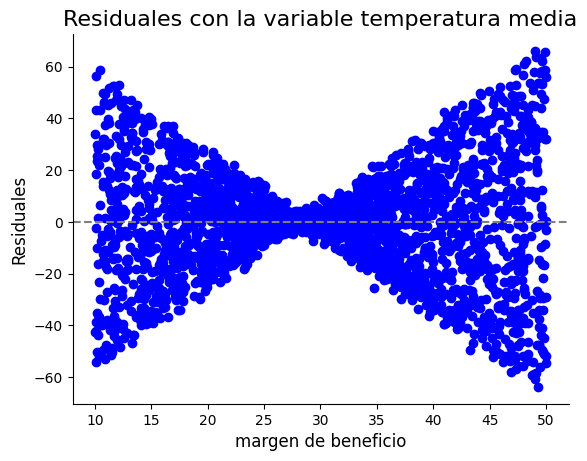

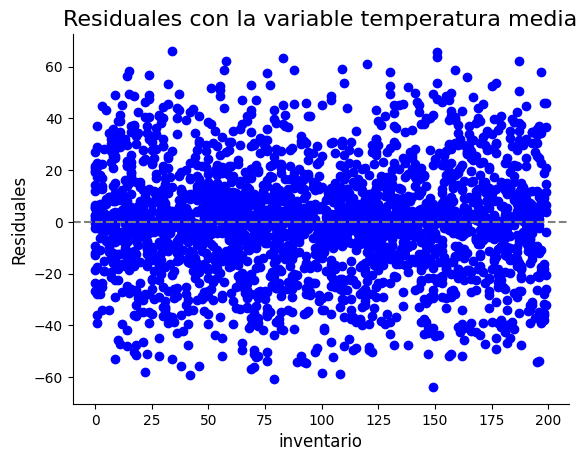

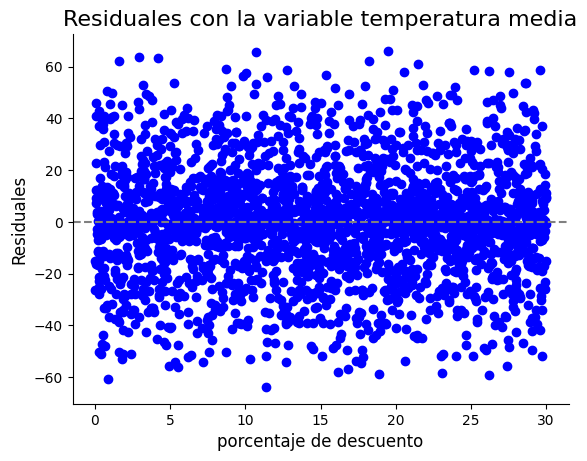

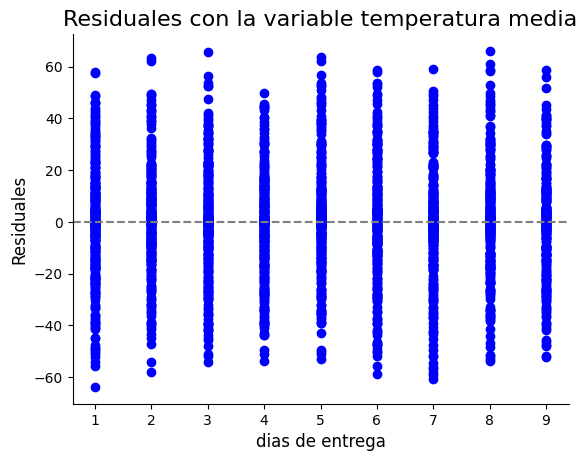

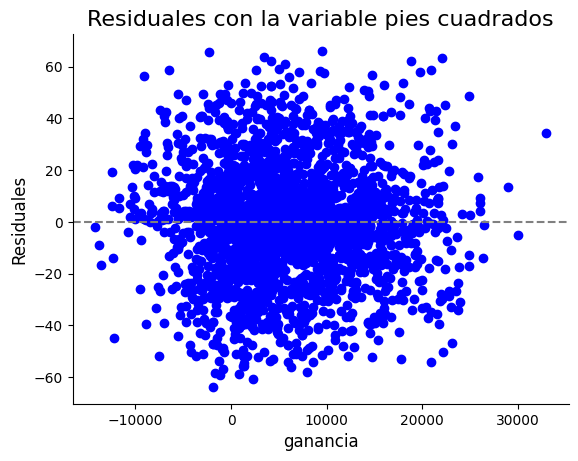

In [ ]:
x = df[["costo","ventas","margen_beneficio","inventario","porcentaje_descuento","dias_de_entrega","color","ubicación","estación","ganancia"]]
y = df["precio"]

# recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# coeficiente de determinación
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# residuales y gráficos de dispersión.


residuales = modelo.resid
plt.figure()
plt.scatter(x["costo"], residuales, color = 'blue')
plt.xlabel('costo', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable número de ocupantes", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["ventas"], residuales, color = 'blue')
plt.xlabel('ventas', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable electrodomesticos usados", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["margen_beneficio"], residuales, color = 'blue')
plt.xlabel('margen de beneficio', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable temperatura media", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["inventario"], residuales, color = 'blue')
plt.xlabel('inventario', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable temperatura media", fontsize = 16)

residuales = modelo.resid
plt.figure()
plt.scatter(x["porcentaje_descuento"], residuales, color = 'blue')
plt.xlabel('porcentaje de descuento', fontsize = 12)
plt.ylabel("Residuales", fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable temperatura media", fontsize = 16)



residuales = modelo.resid
plt.figure()
plt.scatter(x["dias_de_entrega"], residuales, color = 'blue')
plt.xlabel('dias de entrega', fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable temperatura media", fontsize = 16)


residuales = modelo.resid
plt.figure()
plt.scatter(x["ganancia"], residuales, color = 'blue')
plt.xlabel("ganancia", fontsize = 12)
plt.ylabel('Residuales', fontsize = 12)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable pies cuadrados", fontsize = 16)


# prueba de Shapiro
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# prueba de Brausch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# tabla ANOVA,
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols(
    "precio ~ costo + ventas + margen_beneficio + inventario + porcentaje_descuento + dias_de_entrega + color + ubicación + estación + ganancia",
    data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova